In [4]:
import numpy as np
import pandas as pd
from skimage import io, feature, color, data, exposure
import matplotlib.pyplot as plt 
import cv2
import os
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split

In [2]:
train_img_path = './data/seg_train/seg_train/'
test_img_path = './data/seg_test/seg_test/'

X_train = []
y_train = []

X_test = []
y_test = []

labels=['Buildings','Forest', 'Glacier','Mountain','Sea','Street']


In [3]:
#Extracts Histogram of Oriented Gradients of one image used for classification
def get_hog(jpeg_path):
    jpg = cv2.imread(jpeg_path)
    jpg = cv2.resize(jpg,(150,150)) 
    hog = feature.hog(jpg)/255.0
    return hog

In [4]:
#Fetches all images from the data folder and gets hog for each file aswell as saves the labels in different array
#Works with both train and test data
def jpeg_to_array (scene_type, img_root_path, data_type):
    scene_path = os.path.join(img_root_path,scene_type.lower())
    print('Loading ' + data_type +' images for scene type '+scene_type)
    for img in os.listdir(scene_path):
        img_path = os.path.join(scene_path,img)
        #Check if the path leads to an image
        if img_path.endswith('.jpg'):
            #Check if it is training or testing data and puts it in the right array
            if(data_type == 'Training'):
                X_train.append(get_hog(img_path))
                y_train.append(labels.index(str(scene_type)))
            if(data_type =='Testing'):
                X_test.append(get_hog(img_path))
                y_test.append(labels.index(str(scene_type)))


In [5]:
[jpeg_to_array(scene,train_img_path,'Training')for scene in labels]

Loading Training images for scene type Buildings
Loading Training images for scene type Forest
Loading Training images for scene type Glacier
Loading Training images for scene type Mountain
Loading Training images for scene type Sea
Loading Training images for scene type Street


[None, None, None, None, None, None]

In [6]:
[jpeg_to_array(scene,test_img_path,'Testing')for scene in labels]

Loading Testing images for scene type Buildings
Loading Testing images for scene type Forest
Loading Testing images for scene type Glacier
Loading Testing images for scene type Mountain
Loading Testing images for scene type Sea
Loading Testing images for scene type Street


[None, None, None, None, None, None]

In [7]:
X_sample, X_rest, y_sample, y_rest = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

In [28]:
# train the model on train set 
model = SVC() 


In [29]:
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [30]:
prediction = model.predict(X_test) 

In [31]:
confusion_matrix(y_test, prediction)

array([[357,   3,  16,   6,  10,  45],
       [  3, 446,   9,   3,   1,  12],
       [  6,  15, 367, 124,  38,   3],
       [  3,   8, 135, 304,  72,   3],
       [ 14,   6,  58,  64, 364,   4],
       [ 49,  17,   9,   3,  10, 413]])

In [32]:
accuracy_score(y_test,prediction)

0.7503333333333333

In [52]:
example_image = cv2.imread('./data/seg_train/seg_train/buildings/463.jpg')

In [58]:
example_image = example_image-255

In [59]:
example_image

array([[[115,  41,   5],
        [115,  41,   5],
        [115,  41,   5],
        ...,
        [119,  44,   6],
        [119,  44,   6],
        [119,  44,   6]],

       [[116,  42,   6],
        [116,  42,   6],
        [116,  42,   6],
        ...,
        [119,  44,   6],
        [119,  44,   6],
        [119,  44,   6]],

       [[117,  43,   7],
        [117,  43,   7],
        [116,  42,   6],
        ...,
        [119,  44,   6],
        [119,  44,   5],
        [119,  44,   5]],

       ...,

       [[240, 226, 220],
        [252, 240, 230],
        [154, 147, 128],
        ...,
        [115, 108, 111],
        [115, 112, 114],
        [106, 105, 107]],

       [[230, 217, 209],
        [233, 222, 208],
        [166, 158, 135],
        ...,
        [ 88,  81,  84],
        [ 89,  84,  86],
        [ 87,  84,  86]],

       [[237, 225, 215],
        [222, 211, 197],
        [227, 220, 195],
        ...,
        [ 78,  71,  74],
        [ 79,  72,  75],
        [ 81,  76,  78]]

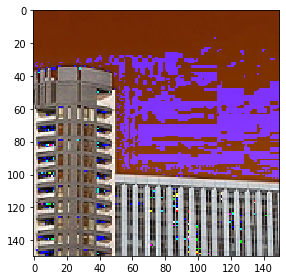

In [60]:
io.imshow(example_image)

In [45]:
hog_example, hog_image = feature.hog(example_image,visualize=True)

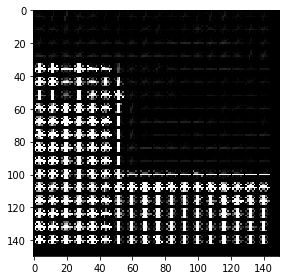

In [46]:
#Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
io.imshow(hog_image_rescaled, cmap=plt.cm.gray)